In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


In [2]:
ds=pd.read_csv("anxiety_attack_dataset.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [3]:
le=LabelEncoder()
ds["Gender"]=le.fit_transform(ds["Gender"])
ds

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,0,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,1,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,0,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,1,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,1,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,1,Engineer,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,0,Doctor,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,11998,23,0,Student,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999,52,1,Teacher,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5


In [4]:
le=LabelEncoder()
ds["Occupation"]=le.fit_transform(ds["Occupation"])
ds

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,0,2,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,1,4,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,0,0,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,1,0,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,1,3,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,1,1,4.4,4.1,360,1,Yes,Yes,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,0,0,9.9,2.2,433,4,No,Yes,4,150,33,2,No,No,3,No,5,6
11997,11998,23,0,3,9.8,8.1,140,19,Yes,No,2,81,33,2,No,No,8,No,1,10
11998,11999,52,1,4,5.9,6.6,114,12,No,No,9,90,14,5,No,No,3,No,9,5


In [5]:
le=LabelEncoder()
ds["Family History of Anxiety"]=le.fit_transform(ds["Family History of Anxiety"])
ds

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,0,2,9.6,8.3,175,6,No,0,4,145,33,3,No,No,4,Yes,9,10
1,2,46,1,4,6.4,7.3,97,6,No,0,3,143,18,5,Yes,No,0,No,9,8
2,3,32,0,0,6.9,1.0,467,14,No,0,2,60,34,1,No,No,7,Yes,10,5
3,4,60,1,0,9.2,3.7,471,16,No,1,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,1,3,9.2,2.5,364,2,No,1,7,152,15,4,No,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,1,1,4.4,4.1,360,1,Yes,1,1,139,20,2,Yes,No,7,No,9,6
11996,11997,49,0,0,9.9,2.2,433,4,No,1,4,150,33,2,No,No,3,No,5,6
11997,11998,23,0,3,9.8,8.1,140,19,Yes,0,2,81,33,2,No,No,8,No,1,10
11998,11999,52,1,4,5.9,6.6,114,12,No,0,9,90,14,5,No,No,3,No,9,5


In [6]:
le=LabelEncoder()
ds["Dizziness"]=le.fit_transform(ds["Dizziness"])
ds

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,0,2,9.6,8.3,175,6,No,0,4,145,33,3,0,No,4,Yes,9,10
1,2,46,1,4,6.4,7.3,97,6,No,0,3,143,18,5,1,No,0,No,9,8
2,3,32,0,0,6.9,1.0,467,14,No,0,2,60,34,1,0,No,7,Yes,10,5
3,4,60,1,0,9.2,3.7,471,16,No,1,6,94,19,1,0,Yes,4,Yes,5,8
4,5,25,1,3,9.2,2.5,364,2,No,1,7,152,15,4,0,Yes,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,1,1,4.4,4.1,360,1,Yes,1,1,139,20,2,1,No,7,No,9,6
11996,11997,49,0,0,9.9,2.2,433,4,No,1,4,150,33,2,0,No,3,No,5,6
11997,11998,23,0,3,9.8,8.1,140,19,Yes,0,2,81,33,2,0,No,8,No,1,10
11998,11999,52,1,4,5.9,6.6,114,12,No,0,9,90,14,5,0,No,3,No,9,5


In [7]:
le=LabelEncoder()
ds["Medication"]=le.fit_transform(ds["Medication"])
ds

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,0,2,9.6,8.3,175,6,No,0,4,145,33,3,0,0,4,Yes,9,10
1,2,46,1,4,6.4,7.3,97,6,No,0,3,143,18,5,1,0,0,No,9,8
2,3,32,0,0,6.9,1.0,467,14,No,0,2,60,34,1,0,0,7,Yes,10,5
3,4,60,1,0,9.2,3.7,471,16,No,1,6,94,19,1,0,1,4,Yes,5,8
4,5,25,1,3,9.2,2.5,364,2,No,1,7,152,15,4,0,1,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,1,1,4.4,4.1,360,1,Yes,1,1,139,20,2,1,0,7,No,9,6
11996,11997,49,0,0,9.9,2.2,433,4,No,1,4,150,33,2,0,0,3,No,5,6
11997,11998,23,0,3,9.8,8.1,140,19,Yes,0,2,81,33,2,0,0,8,No,1,10
11998,11999,52,1,4,5.9,6.6,114,12,No,0,9,90,14,5,0,0,3,No,9,5


In [8]:
le=LabelEncoder()
ds["Smoking"]=le.fit_transform(ds["Smoking"])
ds

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,0,2,9.6,8.3,175,6,0,0,4,145,33,3,0,0,4,Yes,9,10
1,2,46,1,4,6.4,7.3,97,6,0,0,3,143,18,5,1,0,0,No,9,8
2,3,32,0,0,6.9,1.0,467,14,0,0,2,60,34,1,0,0,7,Yes,10,5
3,4,60,1,0,9.2,3.7,471,16,0,1,6,94,19,1,0,1,4,Yes,5,8
4,5,25,1,3,9.2,2.5,364,2,0,1,7,152,15,4,0,1,0,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,1,1,4.4,4.1,360,1,1,1,1,139,20,2,1,0,7,No,9,6
11996,11997,49,0,0,9.9,2.2,433,4,0,1,4,150,33,2,0,0,3,No,5,6
11997,11998,23,0,3,9.8,8.1,140,19,1,0,2,81,33,2,0,0,8,No,1,10
11998,11999,52,1,4,5.9,6.6,114,12,0,0,9,90,14,5,0,0,3,No,9,5


In [9]:
le=LabelEncoder()
ds["Recent Major Life Event"]=le.fit_transform(ds["Recent Major Life Event"])
ds

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,0,2,9.6,8.3,175,6,0,0,4,145,33,3,0,0,4,1,9,10
1,2,46,1,4,6.4,7.3,97,6,0,0,3,143,18,5,1,0,0,0,9,8
2,3,32,0,0,6.9,1.0,467,14,0,0,2,60,34,1,0,0,7,1,10,5
3,4,60,1,0,9.2,3.7,471,16,0,1,6,94,19,1,0,1,4,1,5,8
4,5,25,1,3,9.2,2.5,364,2,0,1,7,152,15,4,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,1,1,4.4,4.1,360,1,1,1,1,139,20,2,1,0,7,0,9,6
11996,11997,49,0,0,9.9,2.2,433,4,0,1,4,150,33,2,0,0,3,0,5,6
11997,11998,23,0,3,9.8,8.1,140,19,1,0,2,81,33,2,0,0,8,0,1,10
11998,11999,52,1,4,5.9,6.6,114,12,0,0,9,90,14,5,0,0,3,0,9,5


In [10]:
ds.isnull().sum()

ID                                   0
Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm during attack)       0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Severity of Anxiety Attack (1-10)    0
dtype: int64

In [11]:
x=ds["Age"]
y=ds["Gender"]
x.shape

(12000,)

<Axes: >

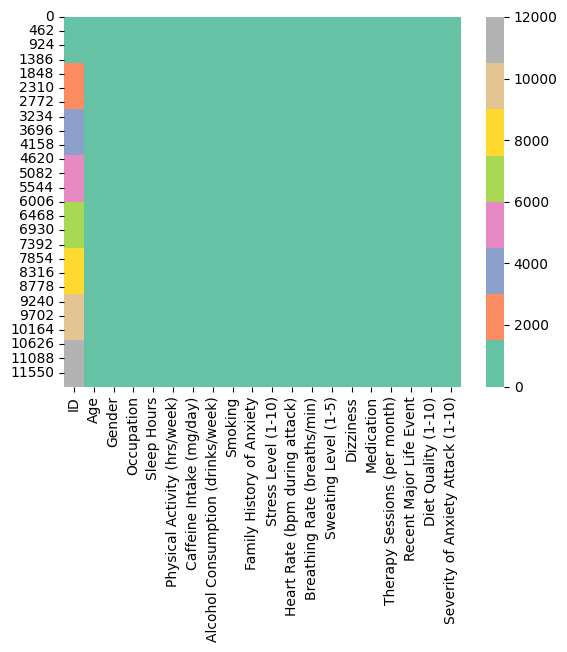

In [12]:
sns.heatmap(ds,cmap="Set2")


In [13]:
x=ds.iloc[:,0:19]
x
y=ds.iloc[:,-1]
y

0        10
1         8
2         5
3         8
4         1
         ..
11995     6
11996     6
11997    10
11998     5
11999     2
Name: Severity of Anxiety Attack (1-10), Length: 12000, dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [15]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9600 entries, 5948 to 5640
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 9600 non-null   int64  
 1   Age                                9600 non-null   int64  
 2   Gender                             9600 non-null   int64  
 3   Occupation                         9600 non-null   int64  
 4   Sleep Hours                        9600 non-null   float64
 5   Physical Activity (hrs/week)       9600 non-null   float64
 6   Caffeine Intake (mg/day)           9600 non-null   int64  
 7   Alcohol Consumption (drinks/week)  9600 non-null   int64  
 8   Smoking                            9600 non-null   int64  
 9   Family History of Anxiety          9600 non-null   int64  
 10  Stress Level (1-10)                9600 non-null   int64  
 11  Heart Rate (bpm during attack)     9600 non-null   int64  

In [16]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2400 entries, 10282 to 7572
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 2400 non-null   int64  
 1   Age                                2400 non-null   int64  
 2   Gender                             2400 non-null   int64  
 3   Occupation                         2400 non-null   int64  
 4   Sleep Hours                        2400 non-null   float64
 5   Physical Activity (hrs/week)       2400 non-null   float64
 6   Caffeine Intake (mg/day)           2400 non-null   int64  
 7   Alcohol Consumption (drinks/week)  2400 non-null   int64  
 8   Smoking                            2400 non-null   int64  
 9   Family History of Anxiety          2400 non-null   int64  
 10  Stress Level (1-10)                2400 non-null   int64  
 11  Heart Rate (bpm during attack)     2400 non-null   int64 

In [17]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 2400 entries, 10282 to 7572
Series name: Severity of Anxiety Attack (1-10)
Non-Null Count  Dtype
--------------  -----
2400 non-null   int64
dtypes: int64(1)
memory usage: 37.5 KB


In [20]:
ds.columns

Index(['ID', 'Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)'],
      dtype='object')

In [24]:
from sklearn.feature_extraction.text import CountVectorizer